# Lead in the Water
For my dataset, I decided to analyze neighborhoods based on likelihood of childhood lead exposure. The WPRDC helpfully has a dataset of historical data going back to 2015.


In [2]:
#necessary imports
import pandas as pd
import geopandas as gp
%matplotlib inline

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,temp,Shape__Are,Shape__Len,geometry
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,1.068796e+07,19600.573085,"POLYGON ((-80.02999 40.45909, -80.02989 40.458..."
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,1.133208e+07,21174.473326,"POLYGON ((-80.01078 40.49975, -80.01073 40.499..."
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,8.743618e+06,13811.917169,"POLYGON ((-80.00327 40.48271, -80.00325 40.482..."
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,1.754935e+07,18197.745741,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,15,Stephanie Joy Everett,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,2.522420e+07,26390.549314,"POLYGON ((-80.01422 40.47745, -80.01435 40.477..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1378,251,42,003,320400,3,420033204003,Block Group 3,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,2.338689e+07,31964.844864,"POLYGON ((-79.99633 40.39458, -79.99630 40.394..."
86,1379,265,42,003,563000,4,420035630004,Block Group 4,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,3.683820e+06,9978.225999,"POLYGON ((-80.06919 40.46046, -80.06912 40.460..."
87,1380,358,42,003,562500,1,420035625001,Block Group 1,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,6.425358e+06,25260.814467,"POLYGON ((-80.05154 40.46364, -80.05140 40.463..."
88,1381,298,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,15,Sophia Robison,pgh.admin,2020-08-14,pgh.admin,2020-08-14,None,1.027920e+07,16308.247349,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."


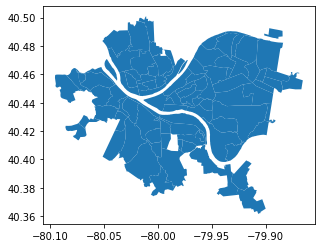

In [79]:
nb = gp.read_file("neighborhoods/Neighborhoods_.shp")
nb.plot()
nb

In [87]:
ell = pd.read_csv("elevated-blood-lead-levels.csv")

#Need to create a column to enable us to map to the neighborhood data
#ell.insert(0,"tractce10",(ell["CensusTract"]-42003000000).astype('object'))
ell.insert(0,"tractce10",(ell["CensusTract"]-42003000000).zfill(6))

ell[['tractce10','percentEBLL15_20']]


AttributeError: 'Series' object has no attribute 'zfill'

In [86]:
ellnb = nb.merge(ell, how="left", on="tractce10")
#ellnb.plot(column='percentEBLL15_20')
ellnb[['hood','tractce10','percentEBLL15_20']].sort_values('tractce10')

,hood,tractce10,percentEBLL15_20
46,Bluff,010300,NaN
41,Central Business District,020100,NaN
40,Strip District,020300,NaN
39,Crawford-Roberts,030500,NaN
38,West Oakland,040200,NaN
...,...,...,...
82,South Shore,980700,NaN
15,Marshall-Shadeland,980900,NaN
42,Central Lawrenceville,981000,NaN
53,Point Breeze,981100,NaN


In [ ]:
ellnb.plot(column='percentEBLL15_20', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )